In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_json('MSCOCO_train_val_Korean.json')
df

,file_path,captions,id,caption_ko
0,val2014/COCO_val2014_000000391895.jpg,[A man with a red helmet on a small moped on a...,391895,"[빨간 헬멧을 쓴 남자가 작은 모터 달린 비포장 도로를 달려 있다., 시골의 비포장..."
1,val2014/COCO_val2014_000000522418.jpg,[A woman wearing a net on her head cutting a c...,522418,"[케이크를 자르고 있는 머리에 그물을 두른 여자, 큰 하얀 시트 케이크를 자르고 있..."
2,val2014/COCO_val2014_000000184613.jpg,[A child holding a flowered umbrella and petti...,184613,"[꽃이 핀 우산을 들고 북을 치고 있는 아이., 한 젊은 남자가 소떼 옆에 우산을 ..."
3,val2014/COCO_val2014_000000318219.jpg,[A young boy standing in front of a computer k...,318219,"[컴퓨터 키보드 앞에 서 있는 어린 소년, 헤드폰을 끼고 컴퓨터 모니터를 보고 있는..."
4,val2014/COCO_val2014_000000554625.jpg,[a boy wearing headphones using one computer i...,554625,"[긴 컴퓨터 한줄에 헤드폰을 끼고 있는 소년, 이어폰을 끼고 무언가를 듣는 어린 소..."
...,...,...,...,...
123282,train2014/COCO_train2014_000000444010.jpg,[A group of friends sitting down at a table sh...,444010,"[한 무리의 친구들이 식사를 나누어 먹으며 테이블에 앉아 있다., 식당 테이블에 앉..."
123283,train2014/COCO_train2014_000000565004.jpg,"[wine being poured into a glass over a table, ...",565004,"[테이블 위의 유리 컵에 따른 와인, 컵에 적포도주를 따른다., 테이블 위의 유리 ..."
123284,train2014/COCO_train2014_000000516168.jpg,"[A man is standing behind a bar with glases, A...",516168,"[한 남자가 안경을 끼고 바에 서 있다., 와인 잔이 있는 테이블에서 종이를 관찰하..."
123285,train2014/COCO_train2014_000000547503.jpg,[A group of men sitting at a bar having drinks...,547503,"[술집에 앉아 술을 마시고 있는 한 무리의 남자들, 투수 앞에 한 남자가 앉아 있다..."


In [3]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 1.5/1.5 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 3.4 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     -------------------------------------- 895.9/895.9 kB 3.5 MB/s eta 0:00:00
  Using cached tensorboard_plugin_wit-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, \
Activation, RepeatVector,Concatenate

In [2]:
embedding_size = 128
MAX_LEN = 39
max_len = MAX_LEN
VOCAB_SIZE = 3832
vocab_size = VOCAB_SIZE + 1

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])

w = LSTM(128, return_sequences=True)(conca)
w = LSTM(512, return_sequences=False)(w)
w = Dense(vocab_size)(w)
out = Activation('softmax')(w)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 39, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 39, 128)           490624    
                                                                 
 lstm (LSTM)                 (None, 39, 256)           394240    
                            

In [7]:
%pip install pydot

Defaulting to user installation because normal site-packages is not writeable


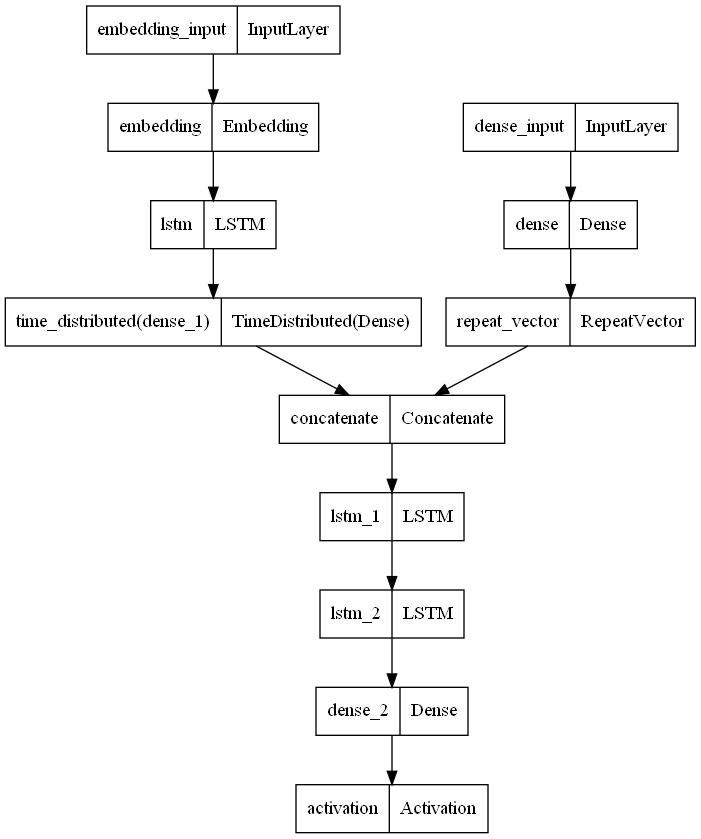

In [3]:
plot_model(model)